## SurfinPy

#### Tutorial 1 - Generating a phase diagram as a function of chemical potential and surface energy at 0 K

In this tutorial we will learn how to generate a basic phase diagram from DFT energies. This example will consider a series of surfaces that contain differing amounts of surface oxygen and adsorbed water species. 
The physical quantity that is used to define the stability of a surface with a given composition is its surface energy $\gamma$ (J $m^{-2}$). 

\begin{align}
\gamma_{Surf} & = \frac{1}{2S} \Bigg( E_{MO}^{slab} - \frac{N_M}{x} E_{MO}^{Bulk} \Bigg) - \Delta \Gamma_O \mu_O - \Delta \Gamma_{H_2O} \mu_{H_2O}
\end{align}

where S is the surface area, $E_{MO}^{slab}$ is the DFT energy of the stoichiometric slab, $N_M$ is the number of cations in the structure, x is the number of cations in the bulk unit cell, $E_{MO}^{Bulk}$ is the DFT energy of the bulk unit cell, $\Gamma_O$ / $\Gamma_{H_2O}$ is the excess oxygen / water at the surface and $\mu_O$ / $\mu_{H_2O}$ is the oxygen / water chemcial potential. Clearly $\Gamma$ and $\mu$ will only matter when the surface is non stoichiometric. 

So now lets work through an example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#sys.path.append('../surfinpy/')

from surfinpy import mu_vs_mu

The first thing to do is input the data that we have generated from our DFT simulations. The input data needs to be contained within a dictionary. First we have created the bulk dictionary where 'M' is the number of cations, 'O' is the number of anions, 'Energy' is the DFT energy and 'F-Units' is the number of formula units in the simulation. 

In [2]:
bulk = {'M' : 1, 'O' : 2, 'Energy' : -781.954938, 'F-Units' : 4}

Next we create the surface dictionaries - One for each surface or "phase". 'M' is the number of cations, 'X' is in this case the number of oxygen species (corresponding to the X axis of our phase diagram), 'Y' is the number of in this case water molecules (corresponding to the Y axis of our phase diagram), 'Area' is the surface area, 'Energy' is the DFT energy, and 'Label' is the label for the that surface (appears on the phase diagram).

In [3]:
pure =     {'M': 24, 'X': 48, 'Y': 0, 'Area': 60.22, 'Energy': -575.570172,   'Label': 'Stoich'}
H2O =      {'M': 24, 'X': 48, 'Y': 2, 'Area': 60.22, 'Energy': -607.023918,   'Label': '1 Water'}
H2O_2 =    {'M': 24, 'X': 48, 'Y': 4, 'Area': 60.22, 'Energy': -639.246207,   'Label': '2 Water'}
H2O_3 =    {'M': 24, 'X': 48, 'Y': 8, 'Area': 60.22, 'Energy': -696.257891,   'Label': '3 Water'}

Vo =       {'M': 24, 'X': 46, 'Y': 0, 'Area': 60.22, 'Energy': -559.446890,   'Label': 'M'}
H2O_Vo =   {'M': 24, 'X': 46, 'Y': 2, 'Area': 60.22, 'Energy': -593.5710300,  'Label': 'Vo + 1 Water'}
H2O_Vo_2 = {'M': 24, 'X': 46, 'Y': 4, 'Area': 60.22, 'Energy': -624.5395200,  'Label': 'Vo + 2 Water'}
H2O_Vo_3 = {'M': 24, 'X': 46, 'Y': 6, 'Area': 60.22, 'Energy': -655.31882000, 'Label': 'Vo + 3 Water'}
H2O_Vo_4 = {'M': 24, 'X': 46, 'Y': 8, 'Area': 60.22, 'Energy': -683.71649000, 'Label': 'Vo + 4 Water'}

Next we need to create a list of our data. Having a single object associated with the data makes life easier. 

In [4]:
data = [pure, H2O_2, H2O_Vo, H2O,  H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4, Vo]

We now need to generate our X and Y axis, or more appropriately, our chemical potential values. Again these exist in a dictionary. 'Range' corresponds to the range of chemcial potential values to be considered and 'Label' is the axis label.

In [5]:
deltaX = {'Range': [ -10, -4],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}

And finally we can generate our plot using these 4 variables of data. 

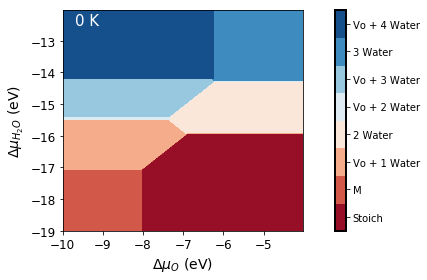

In [6]:
mu_vs_mu.calculate(data, bulk, deltaX, deltaY)

This plot is a good start in that the relative stability of the surfaces has been evaluated. However the chemical potential values are essentially meaningless and can be dependent on the pseudopotentials. In the next tutorial we will learn how to convert these numbers into something a bit more meaningful.